<a href="https://colab.research.google.com/github/vekteo/ASRT_JSPsych_Analysis/blob/main/ASRT_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
Hello Google Drive!

In [ ]:
import glob
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from google.colab import files

In [ ]:
root_path = os.path.join('/gdrive', 'My Drive')
data_path = os.path.join(root_path, 'Colab Notebooks/ASRT_analysis')
os.listdir(data_path)

['ASRT_analysis.ipynb', 'output_test.csv']

In [ ]:
# get data file names
filenames = glob.glob(data_path + "/*.csv")
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
big_frame = pd.concat(dfs, ignore_index=True)

In [ ]:
big_frame.head()

,success,trial_type,trial_index,time_elapsed,internal_node_id,subject,browserEvents,view_history,rt,stimulus,key_press,correct,grid,target,trialType,block,firstResponse,trialNumber,sequence,isPractice,correctPos,correctRespButton,respButton,cumulativeRT,actualTriplet,tripletType
0,True,fullscreen,0,2804,0.0-0.0,nrwpyjsw0r0nnm1,"[{""event"":""fullscreenenter"",""trial"":0,""time"":1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,instructions,1,10492,0.0-1.0,nrwpyjsw0r0nnm1,[],"[{""page_index"":0,""viewing_time"":2199.419999989...",7560.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,html-keyboard-response,2,13213,0.0-2.0,nrwpyjsw0r0nnm1,[],NaN,2586.850,"<p>If you are ready, press <strong>ANY</strong...",83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,serial-reaction-time,3,14685,0.0-3.0-0.0,nrwpyjsw0r0nnm1,[],NaN,332.405,NaN,75.0,True,"[[1,1,1,1]]","[0,3]",R,1.0,1.0,1.0,3412.0,1.0,4.0,k,k,332.405,4.0,X
4,NaN,serial-reaction-time,4,15275,0.0-104.0-0.0,nrwpyjsw0r0nnm1,[],NaN,341.635,NaN,68.0,True,"[[1,1,1,1]]","[0,1]",R,1.0,1.0,2.0,3412.0,1.0,2.0,d,d,341.635,42.0,X


In [ ]:
#leave only the important columns
df = big_frame.loc[:, ['subject','rt','correct','tripletType','trialType','block','sequence','isPractice','firstResponse','trialNumber','correctPos', 'correctRespButton', 'respButton','cumulativeRT','actualTriplet']]
df.head()

,subject,rt,correct,tripletType,trialType,block,sequence,isPractice,firstResponse,trialNumber,correctPos,correctRespButton,respButton,cumulativeRT,actualTriplet
0,nrwpyjsw0r0nnm1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nrwpyjsw0r0nnm1,7560.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nrwpyjsw0r0nnm1,2586.850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nrwpyjsw0r0nnm1,332.405,True,X,R,1.0,3412.0,1.0,1.0,1.0,4.0,k,k,332.405,4.0
4,nrwpyjsw0r0nnm1,341.635,True,X,R,1.0,3412.0,1.0,1.0,2.0,2.0,d,d,341.635,42.0


In [ ]:
#define correct and incorrect trials
df.loc[df['correct'] == True, 'ACC'] = 1
df.loc[df['correct'] == False, 'ACC'] = 0
df.head()

,subject,rt,correct,tripletType,trialType,block,sequence,isPractice,firstResponse,trialNumber,correctPos,correctRespButton,respButton,cumulativeRT,actualTriplet,ACC
0,nrwpyjsw0r0nnm1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nrwpyjsw0r0nnm1,7560.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nrwpyjsw0r0nnm1,2586.850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nrwpyjsw0r0nnm1,332.405,True,X,R,1.0,3412.0,1.0,1.0,1.0,4.0,k,k,332.405,4.0,1.0
4,nrwpyjsw0r0nnm1,341.635,True,X,R,1.0,3412.0,1.0,1.0,2.0,2.0,d,d,341.635,42.0,1.0


In [ ]:
#define epochs
df.loc[df['block'] <= 5, 'epoch'] = 1
df.loc[(df['block'] >= 6)  & (df['block'] <= 10), 'epoch'] = 2
df.loc[(df['block'] >= 11) & (df['block'] <= 15), 'epoch'] = 3 
df.loc[(df['block'] >= 16) & (df['block'] <= 20), 'epoch'] = 4 
df.loc[(df['block'] >= 21) & (df['block'] <= 25), 'epoch'] = 5

df.head()

,subject,rt,correct,tripletType,trialType,block,sequence,isPractice,firstResponse,trialNumber,correctPos,correctRespButton,respButton,cumulativeRT,actualTriplet,ACC,epoch
0,nrwpyjsw0r0nnm1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nrwpyjsw0r0nnm1,7560.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nrwpyjsw0r0nnm1,2586.850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nrwpyjsw0r0nnm1,332.405,True,X,R,1.0,3412.0,1.0,1.0,1.0,4.0,k,k,332.405,4.0,1.0,1.0
4,nrwpyjsw0r0nnm1,341.635,True,X,R,1.0,3412.0,1.0,1.0,2.0,2.0,d,d,341.635,42.0,1.0,1.0


In [ ]:
#define half-blocks
df.loc[df['trialNumber'] <= 45, 'half_block'] = 1
df.loc[df['trialNumber'] >= 46, 'half_block'] = 2
df.head()

,subject,rt,correct,tripletType,trialType,block,sequence,isPractice,firstResponse,trialNumber,correctPos,correctRespButton,respButton,cumulativeRT,actualTriplet,ACC,epoch,half_block
0,nrwpyjsw0r0nnm1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nrwpyjsw0r0nnm1,7560.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nrwpyjsw0r0nnm1,2586.850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nrwpyjsw0r0nnm1,332.405,True,X,R,1.0,3412.0,1.0,1.0,1.0,4.0,k,k,332.405,4.0,1.0,1.0,1.0
4,nrwpyjsw0r0nnm1,341.635,True,X,R,1.0,3412.0,1.0,1.0,2.0,2.0,d,d,341.635,42.0,1.0,1.0,1.0


In [ ]:
#drop instruction, feedback trials
df = df.dropna()
df.head()

,subject,rt,correct,tripletType,trialType,block,sequence,isPractice,firstResponse,trialNumber,correctPos,correctRespButton,respButton,cumulativeRT,actualTriplet,ACC,epoch,half_block
3,nrwpyjsw0r0nnm1,332.405,True,X,R,1.0,3412.0,1.0,1.0,1.0,4.0,k,k,332.405,4.0,1.0,1.0,1.0
4,nrwpyjsw0r0nnm1,341.635,True,X,R,1.0,3412.0,1.0,1.0,2.0,2.0,d,d,341.635,42.0,1.0,1.0,1.0
5,nrwpyjsw0r0nnm1,188.405,False,X,R,1.0,3412.0,1.0,1.0,3.0,3.0,j,d,188.405,423.0,0.0,1.0,1.0
6,nrwpyjsw0r0nnm1,0.255,True,X,R,1.0,3412.0,1.0,0.0,3.0,3.0,j,j,188.660,423.0,1.0,1.0,1.0
7,nrwpyjsw0r0nnm1,283.090,False,X,R,1.0,3412.0,1.0,1.0,4.0,1.0,s,d,283.090,231.0,0.0,1.0,1.0


In [ ]:
#drop not first responses
indexNames = df[ df['firstResponse'] == 0 ].index
df.drop(indexNames , inplace=True)
df.head()

,subject,rt,correct,tripletType,trialType,block,sequence,isPractice,firstResponse,trialNumber,correctPos,correctRespButton,respButton,cumulativeRT,actualTriplet,ACC,epoch,half_block
3,nrwpyjsw0r0nnm1,332.405,True,X,R,1.0,3412.0,1.0,1.0,1.0,4.0,k,k,332.405,4.0,1.0,1.0,1.0
4,nrwpyjsw0r0nnm1,341.635,True,X,R,1.0,3412.0,1.0,1.0,2.0,2.0,d,d,341.635,42.0,1.0,1.0,1.0
5,nrwpyjsw0r0nnm1,188.405,False,X,R,1.0,3412.0,1.0,1.0,3.0,3.0,j,d,188.405,423.0,0.0,1.0,1.0
7,nrwpyjsw0r0nnm1,283.090,False,X,R,1.0,3412.0,1.0,1.0,4.0,1.0,s,d,283.090,231.0,0.0,1.0,1.0
9,nrwpyjsw0r0nnm1,246.430,True,X,R,1.0,3412.0,1.0,1.0,5.0,3.0,j,j,246.430,313.0,1.0,1.0,1.0


In [ ]:
#drop X, T, R trials
indexNames = df[ df["tripletType"] == "X" ].index
indexNames2 = df[ df["tripletType"] == "T" ].index
indexNames3 = df[ df["tripletType"] == "R" ].index
df.drop(indexNames, inplace=True)
df.drop(indexNames2, inplace=True)
df.drop(indexNames3, inplace=True)
df.head()

,subject,rt,correct,tripletType,trialType,block,sequence,isPractice,firstResponse,trialNumber,correctPos,correctRespButton,respButton,cumulativeRT,actualTriplet,ACC,epoch,half_block
319,nrwpyjsw0r0nnm1,556.395,True,L,R,1.0,3412.0,0.0,1.0,8.0,3.0,j,j,556.395,433.0,1.0,1.0,1.0
320,nrwpyjsw0r0nnm1,261.740,True,H,P,1.0,3412.0,0.0,1.0,9.0,4.0,k,k,261.740,334.0,1.0,1.0,1.0
321,nrwpyjsw0r0nnm1,301.965,False,H,R,1.0,3412.0,0.0,1.0,10.0,4.0,k,j,301.965,344.0,0.0,1.0,1.0
323,nrwpyjsw0r0nnm1,252.015,False,H,P,1.0,3412.0,0.0,1.0,11.0,1.0,s,d,252.015,441.0,0.0,1.0,1.0
325,nrwpyjsw0r0nnm1,365.145,True,L,R,1.0,3412.0,0.0,1.0,12.0,2.0,d,d,365.145,412.0,1.0,1.0,1.0


In [ ]:
#drop practice blocks
indexNames = df[ df['isPractice'] == 1 ].index
df.drop(indexNames , inplace=True)
ACC_raw = df.copy()
df.head()

,subject,rt,correct,tripletType,trialType,block,sequence,isPractice,firstResponse,trialNumber,correctPos,correctRespButton,respButton,cumulativeRT,actualTriplet,ACC,epoch,half_block
319,nrwpyjsw0r0nnm1,556.395,True,L,R,1.0,3412.0,0.0,1.0,8.0,3.0,j,j,556.395,433.0,1.0,1.0,1.0
320,nrwpyjsw0r0nnm1,261.740,True,H,P,1.0,3412.0,0.0,1.0,9.0,4.0,k,k,261.740,334.0,1.0,1.0,1.0
321,nrwpyjsw0r0nnm1,301.965,False,H,R,1.0,3412.0,0.0,1.0,10.0,4.0,k,j,301.965,344.0,0.0,1.0,1.0
323,nrwpyjsw0r0nnm1,252.015,False,H,P,1.0,3412.0,0.0,1.0,11.0,1.0,s,d,252.015,441.0,0.0,1.0,1.0
325,nrwpyjsw0r0nnm1,365.145,True,L,R,1.0,3412.0,0.0,1.0,12.0,2.0,d,d,365.145,412.0,1.0,1.0,1.0


In [ ]:
#drop incorrect trials
indexNames = df[ df['correct'] == False ].index
df.drop(indexNames , inplace=True)
df.head()

,subject,rt,correct,tripletType,trialType,block,sequence,isPractice,firstResponse,trialNumber,correctPos,correctRespButton,respButton,cumulativeRT,actualTriplet,ACC,epoch,half_block
319,nrwpyjsw0r0nnm1,556.395,True,L,R,1.0,3412.0,0.0,1.0,8.0,3.0,j,j,556.395,433.0,1.0,1.0,1.0
320,nrwpyjsw0r0nnm1,261.740,True,H,P,1.0,3412.0,0.0,1.0,9.0,4.0,k,k,261.740,334.0,1.0,1.0,1.0
325,nrwpyjsw0r0nnm1,365.145,True,L,R,1.0,3412.0,0.0,1.0,12.0,2.0,d,d,365.145,412.0,1.0,1.0,1.0
326,nrwpyjsw0r0nnm1,240.620,True,H,P,1.0,3412.0,0.0,1.0,13.0,2.0,d,d,240.620,122.0,1.0,1.0,1.0
327,nrwpyjsw0r0nnm1,315.745,True,L,R,1.0,3412.0,0.0,1.0,14.0,4.0,k,k,315.745,224.0,1.0,1.0,1.0


In [ ]:
#drop pattern trials from RT data (for statistical learning)
indexNames = df[ df["trialType"] == "P" ].index
df_SL = df.drop(indexNames)
df_SL.head(5)

,subject,rt,correct,tripletType,trialType,block,sequence,isPractice,firstResponse,trialNumber,correctPos,correctRespButton,respButton,cumulativeRT,actualTriplet,ACC,epoch,half_block
319,nrwpyjsw0r0nnm1,556.395,True,L,R,1.0,3412.0,0.0,1.0,8.0,3.0,j,j,556.395,433.0,1.0,1.0,1.0
325,nrwpyjsw0r0nnm1,365.145,True,L,R,1.0,3412.0,0.0,1.0,12.0,2.0,d,d,365.145,412.0,1.0,1.0,1.0
327,nrwpyjsw0r0nnm1,315.745,True,L,R,1.0,3412.0,0.0,1.0,14.0,4.0,k,k,315.745,224.0,1.0,1.0,1.0
335,nrwpyjsw0r0nnm1,361.395,True,L,R,1.0,3412.0,0.0,1.0,20.0,1.0,s,s,361.395,211.0,1.0,1.0,1.0
339,nrwpyjsw0r0nnm1,295.390,True,H,R,1.0,3412.0,0.0,1.0,24.0,2.0,d,d,295.390,132.0,1.0,1.0,1.0


In [ ]:
#drop pattern trials from ACC data (for statistical learning)
indexNames = ACC_raw[ ACC_raw["trialType"] == "P" ].index
ACC_SL = ACC_raw.drop(indexNames)
ACC_SL.head()

,subject,rt,correct,tripletType,trialType,block,sequence,isPractice,firstResponse,trialNumber,correctPos,correctRespButton,respButton,cumulativeRT,actualTriplet,ACC,epoch,half_block
319,nrwpyjsw0r0nnm1,556.395,True,L,R,1.0,3412.0,0.0,1.0,8.0,3.0,j,j,556.395,433.0,1.0,1.0,1.0
321,nrwpyjsw0r0nnm1,301.965,False,H,R,1.0,3412.0,0.0,1.0,10.0,4.0,k,j,301.965,344.0,0.0,1.0,1.0
325,nrwpyjsw0r0nnm1,365.145,True,L,R,1.0,3412.0,0.0,1.0,12.0,2.0,d,d,365.145,412.0,1.0,1.0,1.0
327,nrwpyjsw0r0nnm1,315.745,True,L,R,1.0,3412.0,0.0,1.0,14.0,4.0,k,k,315.745,224.0,1.0,1.0,1.0
329,nrwpyjsw0r0nnm1,253.835,False,L,R,1.0,3412.0,0.0,1.0,16.0,2.0,d,s,253.835,432.0,0.0,1.0,1.0


In [ ]:
#drop low trials (for sequence learning)
indexNames = df[ df["tripletType"] == "L" ].index
df_HO = df.drop(indexNames)
df_HO.head(5)

,subject,rt,correct,tripletType,trialType,block,sequence,isPractice,firstResponse,trialNumber,correctPos,correctRespButton,respButton,cumulativeRT,actualTriplet,ACC,epoch,half_block
320,nrwpyjsw0r0nnm1,261.740,True,H,P,1.0,3412.0,0.0,1.0,9.0,4.0,k,k,261.740,334.0,1.0,1.0,1.0
326,nrwpyjsw0r0nnm1,240.620,True,H,P,1.0,3412.0,0.0,1.0,13.0,2.0,d,d,240.620,122.0,1.0,1.0,1.0
328,nrwpyjsw0r0nnm1,246.170,True,H,P,1.0,3412.0,0.0,1.0,15.0,3.0,j,j,246.170,243.0,1.0,1.0,1.0
334,nrwpyjsw0r0nnm1,329.305,True,H,P,1.0,3412.0,0.0,1.0,19.0,1.0,s,s,329.305,421.0,1.0,1.0,1.0
336,nrwpyjsw0r0nnm1,371.635,True,H,P,1.0,3412.0,0.0,1.0,21.0,2.0,d,d,371.635,112.0,1.0,1.0,1.0


In [ ]:
#drop low trials (for sequence learning)
indexNames = ACC_raw[ ACC_raw["tripletType"] == "L" ].index
ACC_HO = ACC_raw.drop(indexNames)
ACC_HO.head(5)

,subject,rt,correct,tripletType,trialType,block,sequence,isPractice,firstResponse,trialNumber,correctPos,correctRespButton,respButton,cumulativeRT,actualTriplet,ACC,epoch,half_block
320,nrwpyjsw0r0nnm1,261.740,True,H,P,1.0,3412.0,0.0,1.0,9.0,4.0,k,k,261.740,334.0,1.0,1.0,1.0
321,nrwpyjsw0r0nnm1,301.965,False,H,R,1.0,3412.0,0.0,1.0,10.0,4.0,k,j,301.965,344.0,0.0,1.0,1.0
323,nrwpyjsw0r0nnm1,252.015,False,H,P,1.0,3412.0,0.0,1.0,11.0,1.0,s,d,252.015,441.0,0.0,1.0,1.0
326,nrwpyjsw0r0nnm1,240.620,True,H,P,1.0,3412.0,0.0,1.0,13.0,2.0,d,d,240.620,122.0,1.0,1.0,1.0
328,nrwpyjsw0r0nnm1,246.170,True,H,P,1.0,3412.0,0.0,1.0,15.0,3.0,j,j,246.170,243.0,1.0,1.0,1.0


In [ ]:
#Triplet learning: calculate median RT per subject per epoch - wide format
TL_RT_wide = df.pivot_table(index=['subject'], columns=['tripletType', 'epoch'], values='rt', aggfunc=np.median)
TL_RT_wide

tripletType            H                  ...        L                  
epoch                1.0     2.0     3.0  ...      2.0       3.0     4.0
subject                                   ...                           
nrwpyjsw0r0nnm1  304.255  308.74  290.24  ...  314.985  302.4825  305.84

[1 rows x 8 columns]

In [ ]:
#Triplet learning half-block: calculate median RT per subject per epoch - wide format
TL_RT_HB_wide = df.pivot_table(index=['subject'], columns=['tripletType', 'epoch', 'half_block'], values='rt', aggfunc=np.median)
TL_RT_HB_wide

tripletType            H                     ...       L                   
epoch                1.0                2.0  ...     3.0      4.0          
half_block           1.0      2.0       1.0  ...     2.0      1.0       2.0
subject                                      ...                           
nrwpyjsw0r0nnm1  305.175  297.705  309.8125  ...  304.66  314.035  305.2875

[1 rows x 16 columns]

In [ ]:
#Triplet learning: calculate mean ACC per subject per epoch - wide format
TL_ACC_wide = ACC_raw.pivot_table(index=['subject'], columns=['tripletType', 'epoch'], values='ACC', aggfunc=np.mean)
TL_ACC_wide

tripletType             H                      ...         L                    
epoch                 1.0       2.0       3.0  ...       2.0       3.0       4.0
subject                                        ...                              
nrwpyjsw0r0nnm1  0.892562  0.947581  0.940928  ...  0.851485  0.863158  0.762376

[1 rows x 8 columns]

In [ ]:
#Triplet learning half-block: calculate mean ACC per subject per epoch - wide format
TL_ACC_HB_wide = ACC_raw.pivot_table(index=['subject'], columns=['tripletType', 'epoch', 'half_block'], values='ACC', aggfunc=np.mean)
TL_ACC_HB_wide

tripletType             H                      ...         L                
epoch                 1.0                 2.0  ...       3.0   4.0          
half_block            1.0       2.0       1.0  ...       2.0   1.0       2.0
subject                                        ...                          
nrwpyjsw0r0nnm1  0.894309  0.890756  0.934426  ...  0.895833  0.62  0.901961

[1 rows x 16 columns]

In [ ]:
#Triplet learning: calculate median RT per subject per epoch - long format
TL_RT_long = df.groupby(["subject","epoch","tripletType"]).agg({"rt": np.median})
TL_RT_long

rt
subject         epoch tripletType          
nrwpyjsw0r0nnm1 1.0   H            304.2550
                      L            312.3100
                2.0   H            308.7400
                      L            314.9850
                3.0   H            290.2400
                      L            302.4825
                4.0   H            290.1450
                      L            305.8400

In [ ]:
#Triplet learning haf-block: calculate median RT per subject per epoch - long format
TL_RT_HB_long = df.groupby(["subject","epoch","tripletType", "half_block"]).agg({"rt": np.median})
TL_RT_HB_long

rt
subject         epoch tripletType half_block          
nrwpyjsw0r0nnm1 1.0   H           1.0         305.1750
                                  2.0         297.7050
                      L           1.0         312.7050
                                  2.0         307.7000
                2.0   H           1.0         309.8125
                                  2.0         307.2800
                      L           1.0         315.8100
                                  2.0         308.0400
                3.0   H           1.0         290.2400
                                  2.0         290.2225
                      L           1.0         299.8700
                                  2.0         304.6600
                4.0   H           1.0         293.8150
                                  2.0         289.5600
                      L           1.0         314.0350
                                  2.0         305.2875

In [ ]:
#Triplet learning: calculate mean ACC per subject per epoch - long format
TL_ACC_long = ACC_raw.groupby(["subject","epoch","tripletType"]).agg({"ACC": np.mean})
TL_ACC_long

ACC
subject         epoch tripletType          
nrwpyjsw0r0nnm1 1.0   H            0.892562
                      L            0.828571
                2.0   H            0.947581
                      L            0.851485
                3.0   H            0.940928
                      L            0.863158
                4.0   H            0.795833
                      L            0.762376

In [ ]:
#Triplet learning half-block: calculate mean ACC per subject per epoch - long format
TL_ACC_HB_long = ACC_raw.groupby(["subject","epoch","tripletType", "half_block"]).agg({"ACC": np.mean})
TL_ACC_HB_long

ACC
subject         epoch tripletType half_block          
nrwpyjsw0r0nnm1 1.0   H           1.0         0.894309
                                  2.0         0.890756
                      L           1.0         0.777778
                                  2.0         0.866667
                2.0   H           1.0         0.934426
                                  2.0         0.960317
                      L           1.0         0.860000
                                  2.0         0.843137
                3.0   H           1.0         0.946903
                                  2.0         0.935484
                      L           1.0         0.829787
                                  2.0         0.895833
                4.0   H           1.0         0.811966
                                  2.0         0.780488
                      L           1.0         0.620000
                                  2.0         0.901961

In [ ]:
#Statistical learning: calculate median RT per subject per epoch - wide format
SL_RT_wide = df_SL.pivot_table(index=['subject'], columns=['tripletType', 'epoch'], values='rt', aggfunc=np.median)
SL_RT_wide

tripletType            H                     ...        L                  
epoch                1.0       2.0      3.0  ...      2.0       3.0     4.0
subject                                      ...                           
nrwpyjsw0r0nnm1  303.695  295.3375  288.745  ...  314.985  302.4825  305.84

[1 rows x 8 columns]

In [ ]:
#Statistical learning half-block: calculate median RT per subject per epoch - wide format
SL_RT_HB_wide = df_SL.pivot_table(index=['subject'], columns=['tripletType', 'epoch', 'half_block'], values='rt', aggfunc=np.median)
SL_RT_HB_wide

tripletType           H                   ...       L                   
epoch               1.0              2.0  ...     3.0      4.0          
half_block          1.0      2.0     1.0  ...     2.0      1.0       2.0
subject                                   ...                           
nrwpyjsw0r0nnm1  306.54  293.475  281.14  ...  304.66  314.035  305.2875

[1 rows x 16 columns]

In [ ]:
#Statistical learning: calculate mean ACC per subject per epoch - wide format
SL_ACC_wide = ACC_SL.pivot_table(index=['subject'], columns=['tripletType', 'epoch'], values='ACC', aggfunc=np.mean)
SL_ACC_wide

tripletType             H                      ...         L                    
epoch                 1.0       2.0       3.0  ...       2.0       3.0       4.0
subject                                        ...                              
nrwpyjsw0r0nnm1  0.829787  0.943396  0.928571  ...  0.851485  0.863158  0.762376

[1 rows x 8 columns]

In [ ]:
#Statistical learning half-block: calculate mean ACC per subject per epoch - wide format
SL_ACC_HB_wide = ACC_SL.pivot_table(index=['subject'], columns=['tripletType', 'epoch', 'half_block'], values='ACC', aggfunc=np.mean)
SL_ACC_HB_wide

tripletType             H                      ...         L                
epoch                 1.0                 2.0  ...       3.0   4.0          
half_block            1.0       2.0       1.0  ...       2.0   1.0       2.0
subject                                        ...                          
nrwpyjsw0r0nnm1  0.857143  0.789474  0.925926  ...  0.895833  0.62  0.901961

[1 rows x 16 columns]

In [ ]:
#Statistical learning: calculate median RT per subject per epoch - long format
SL_RT_long = df_SL.groupby(["subject","epoch","tripletType"]).agg({"rt": np.median})
SL_RT_long

rt
subject         epoch tripletType          
nrwpyjsw0r0nnm1 1.0   H            303.6950
                      L            312.3100
                2.0   H            295.3375
                      L            314.9850
                3.0   H            288.7450
                      L            302.4825
                4.0   H            307.6850
                      L            305.8400

In [ ]:
#Statistical learning half-block: calculate median RT per subject per epoch - long format
SL_RT_HB_long = df_SL.groupby(["subject","epoch","tripletType", "half_block"]).agg({"rt": np.median})
SL_RT_HB_long

rt
subject         epoch tripletType half_block          
nrwpyjsw0r0nnm1 1.0   H           1.0         306.5400
                                  2.0         293.4750
                      L           1.0         312.7050
                                  2.0         307.7000
                2.0   H           1.0         281.1400
                                  2.0         304.1200
                      L           1.0         315.8100
                                  2.0         308.0400
                3.0   H           1.0         288.7450
                                  2.0         290.9850
                      L           1.0         299.8700
                                  2.0         304.6600
                4.0   H           1.0         319.6000
                                  2.0         277.4875
                      L           1.0         314.0350
                                  2.0         305.2875

In [ ]:
#Statistical learning: calculate mean RT per subject per epoch - long format
SL_ACC_long = ACC_SL.groupby(["subject","epoch","tripletType"]).agg({"ACC": np.mean})
SL_ACC_long

ACC
subject         epoch tripletType          
nrwpyjsw0r0nnm1 1.0   H            0.829787
                      L            0.828571
                2.0   H            0.943396
                      L            0.851485
                3.0   H            0.928571
                      L            0.863158
                4.0   H            0.844444
                      L            0.762376

In [ ]:
#Statistical learning half-block: calculate mean RT per subject per epoch - long format
SL_ACC_HB_long = ACC_SL.groupby(["subject","epoch","tripletType", "half_block"]).agg({"ACC": np.mean})
SL_ACC_HB_long

ACC
subject         epoch tripletType half_block          
nrwpyjsw0r0nnm1 1.0   H           1.0         0.857143
                                  2.0         0.789474
                      L           1.0         0.777778
                                  2.0         0.866667
                2.0   H           1.0         0.925926
                                  2.0         0.961538
                      L           1.0         0.860000
                                  2.0         0.843137
                3.0   H           1.0         0.944444
                                  2.0         0.916667
                      L           1.0         0.829787
                                  2.0         0.895833
                4.0   H           1.0         0.818182
                                  2.0         0.869565
                      L           1.0         0.620000
                                  2.0         0.901961

In [ ]:
#Sequence learning: calculate median RT per subject per epoch - wide format
HO_RT_wide = df_HO.pivot_table(index=['subject'], columns=['trialType', 'epoch'], values='rt', aggfunc=np.median)
HO_RT_wide

trialType              P                    ...         R                  
epoch                1.0     2.0       3.0  ...       2.0      3.0      4.0
subject                                     ...                            
nrwpyjsw0r0nnm1  305.015  311.95  292.1575  ...  295.3375  288.745  307.685

[1 rows x 8 columns]

In [ ]:
#Sequence learning half-block: calculate median RT per subject per epoch - wide format
HO_RT_HB_wide = df_HO.pivot_table(index=['subject'], columns=['trialType', 'epoch', 'half_block'], values='rt', aggfunc=np.median)
HO_RT_HB_wide

trialType             P                 ...        R                 
epoch               1.0            2.0  ...      3.0    4.0          
half_block          1.0     2.0    1.0  ...      2.0    1.0       2.0
subject                                 ...                          
nrwpyjsw0r0nnm1  304.35  305.84  315.7  ...  290.985  319.6  277.4875

[1 rows x 16 columns]

In [ ]:
#Sequence learning: calculate mean ACC per subject per epoch - wide format
HO_ACC_wide = ACC_HO.pivot_table(index=['subject'], columns=['trialType', 'epoch'], values='ACC', aggfunc=np.mean)
HO_ACC_wide

trialType               P                     ...         R                    
epoch                 1.0       2.0      3.0  ...       2.0       3.0       4.0
subject                                       ...                              
nrwpyjsw0r0nnm1  0.907692  0.948718  0.94359  ...  0.943396  0.928571  0.844444

[1 rows x 8 columns]

In [ ]:
#Sequence learning half-block: calculate mean ACC per subject per epoch - wide format
HO_ACC_HB_wide = ACC_HO.pivot_table(index=['subject'], columns=['trialType', 'epoch', 'half_block'], values='ACC', aggfunc=np.mean)
HO_ACC_HB_wide

trialType               P                  ...         R                    
epoch                 1.0             2.0  ...       3.0       4.0          
half_block            1.0   2.0       1.0  ...       2.0       1.0       2.0
subject                                    ...                              
nrwpyjsw0r0nnm1  0.905263  0.91  0.936842  ...  0.916667  0.818182  0.869565

[1 rows x 16 columns]

In [ ]:
#Sequence learning: calculate median RT per subject per epoch - long format
HO_RT_long = df_HO.groupby(["subject","epoch","trialType"]).agg({"rt": np.median})
HO_RT_long

rt
subject         epoch trialType          
nrwpyjsw0r0nnm1 1.0   P          305.0150
                      R          303.6950
                2.0   P          311.9500
                      R          295.3375
                3.0   P          292.1575
                      R          288.7450
                4.0   P          289.6850
                      R          307.6850

In [ ]:
#Sequence learning half-block: calculate median RT per subject per epoch - long format
HO_RT_HB_long = df_HO.groupby(["subject","epoch","trialType", "half_block"]).agg({"rt": np.median})
HO_RT_HB_long

rt
subject         epoch trialType half_block          
nrwpyjsw0r0nnm1 1.0   P         1.0         304.3500
                                2.0         305.8400
                      R         1.0         306.5400
                                2.0         293.4750
                2.0   P         1.0         315.7000
                                2.0         308.0100
                      R         1.0         281.1400
                                2.0         304.1200
                3.0   P         1.0         293.4075
                                2.0         289.4675
                      R         1.0         288.7450
                                2.0         290.9850
                4.0   P         1.0         288.4000
                                2.0         292.8150
                      R         1.0         319.6000
                                2.0         277.4875

In [ ]:
#Sequence learning: calculate mean RT per subject per epoch - long format
HO_ACC_long = ACC_HO.groupby(["subject","epoch","trialType"]).agg({"ACC": np.mean})
HO_ACC_long

ACC
subject         epoch trialType          
nrwpyjsw0r0nnm1 1.0   P          0.907692
                      R          0.829787
                2.0   P          0.948718
                      R          0.943396
                3.0   P          0.943590
                      R          0.928571
                4.0   P          0.784615
                      R          0.844444

In [ ]:
#Sequence learning half-block: calculate mean RT per subject per epoch - long format
HO_ACC_HB_long = ACC_HO.groupby(["subject","epoch","trialType", "half_block"]).agg({"ACC": np.mean})
HO_ACC_HB_long

ACC
subject         epoch trialType half_block          
nrwpyjsw0r0nnm1 1.0   P         1.0         0.905263
                                2.0         0.910000
                      R         1.0         0.857143
                                2.0         0.789474
                2.0   P         1.0         0.936842
                                2.0         0.960000
                      R         1.0         0.925926
                                2.0         0.961538
                3.0   P         1.0         0.947368
                                2.0         0.940000
                      R         1.0         0.944444
                                2.0         0.916667
                4.0   P         1.0         0.810526
                                2.0         0.760000
                      R         1.0         0.818182
                                2.0         0.869565

In [ ]:
#Figure settings
sns.set(rc={'figure.figsize':(8,6)})
sns.set(font_scale=1)
sns.set_style("ticks")
sns.set_context(rc={"lines.linewidth": 2.5})


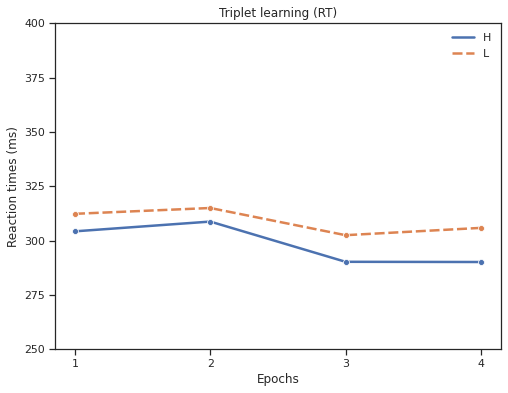

In [ ]:
#Triplet learning RT figure
TL_RT_figure = sns.lineplot(x="epoch", y="rt", err_style="bars", ci = 95, hue ="tripletType", style = "tripletType", marker = "o", data=TL_RT_long)
TL_RT_figure.set(ylim=(250, 400))
TL_RT_figure.set(xlabel ='Epochs', ylabel ='Reaction times (ms)')
plt.legend(loc='upper right', frameon=False)
plt.yticks([250, 275, 300, 325, 350, 375, 400])
plt.xticks([1,2,3,4])
plt.title("Triplet learning (RT)")
TL_RT_figure
plt.savefig("TL_RT_figure.png")

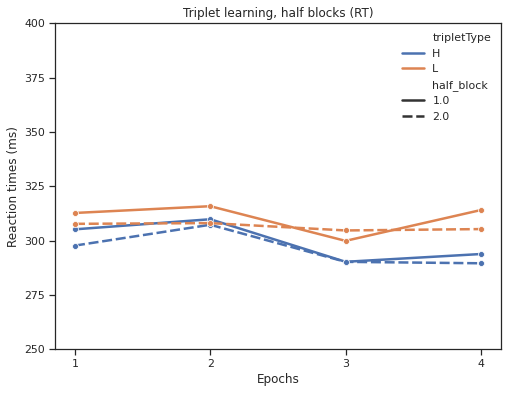

In [ ]:
#Triplet learning half-block RT figure

TL_RT_figure_HB = sns.lineplot(x="epoch", y="rt", hue ="tripletType", style = "half_block",marker = "o", err_style="bars", data=TL_RT_HB_long)
TL_RT_figure_HB.set(ylim=(250, 400))
TL_RT_figure_HB.set(xlabel ='Epochs', ylabel ='Reaction times (ms)')
plt.legend(loc='upper right', frameon=False)
plt.xticks([1,2,3,4])
plt.yticks([250, 275, 300, 325, 350, 375, 400])
plt.title("Triplet learning, half blocks (RT)")
TL_RT_figure_HB
plt.savefig("TL_RT_HB_figure.png")

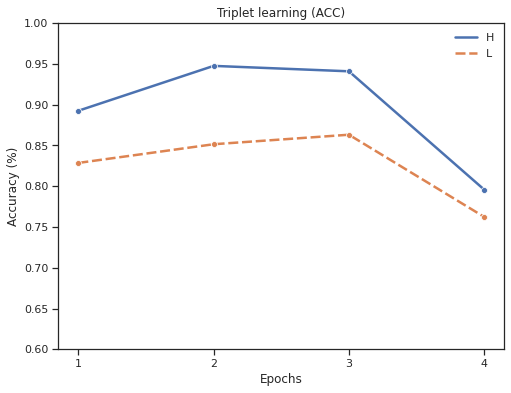

In [ ]:
#Triplet learning ACC figure
TL_ACC_figure = sns.lineplot(x="epoch", y="ACC", hue ="tripletType", style = "tripletType", marker = "o", err_style="bars", data=TL_ACC_long)
TL_ACC_figure.set(ylim=(0.6, 1))
TL_ACC_figure.set(xlabel ='Epochs', ylabel ='Accuracy (%)')
plt.legend(loc='upper right', frameon=False)
plt.xticks([1,2,3,4])
plt.title("Triplet learning (ACC)")
TL_ACC_figure
plt.savefig("TL_ACC_figure.png")

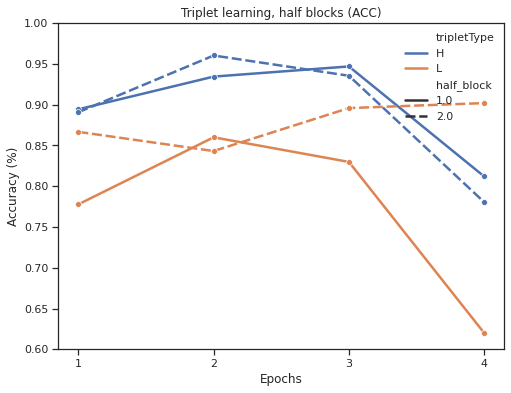

In [ ]:
#Triplet learning half-block ACC figure
TL_ACC_figure_HB = sns.lineplot(x="epoch", y="ACC", hue ="tripletType", style = "half_block", marker = "o", err_style="bars", data=TL_ACC_HB_long)
TL_ACC_figure_HB.set(ylim=(0.6, 1))
TL_ACC_figure_HB.set(xlabel ='Epochs', ylabel ='Accuracy (%)')
plt.legend(loc='upper right', frameon=False)
plt.xticks([1,2,3,4])
plt.title("Triplet learning, half blocks (ACC)")
TL_ACC_figure_HB
plt.savefig("TL_ACC_HB_figure.png")

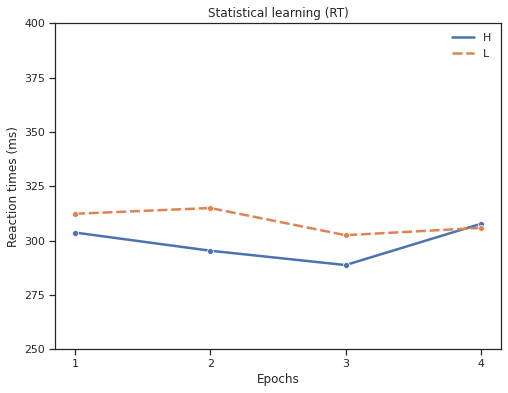

In [ ]:
#Statistical learning RT figure
SL_RT_figure = sns.lineplot(x="epoch", y="rt", hue = "tripletType", style="tripletType", marker = "o", err_style="bars", data=SL_RT_long)
SL_RT_figure.set(ylim=(250, 400))
SL_RT_figure.set(xlabel ='Epochs', ylabel ='Reaction times (ms)')
plt.legend(loc='upper right', frameon=False)
plt.yticks([250, 275, 300, 325, 350, 375, 400])
plt.xticks([1,2,3,4])
plt.title("Statistical learning (RT)")
SL_RT_figure
plt.savefig("SL_RT_figure.png")

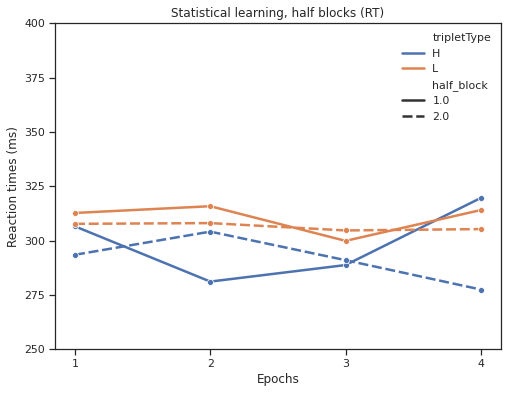

In [ ]:
#Statistical learning half-block RT figure
SL_RT_figure_HB = sns.lineplot(x="epoch", y="rt", hue = "tripletType", style="half_block", marker = "o", err_style="bars", data=SL_RT_HB_long)
SL_RT_figure_HB.set(ylim=(250, 400))
SL_RT_figure_HB.set(xlabel ='Epochs', ylabel ='Reaction times (ms)')
plt.legend(loc='upper right', frameon=False)
plt.yticks([250, 275, 300, 325, 350, 375, 400])
plt.xticks([1,2,3,4])
plt.title("Statistical learning, half blocks (RT)")
SL_RT_figure_HB
plt.savefig("SL_RT_HB_figure.png")

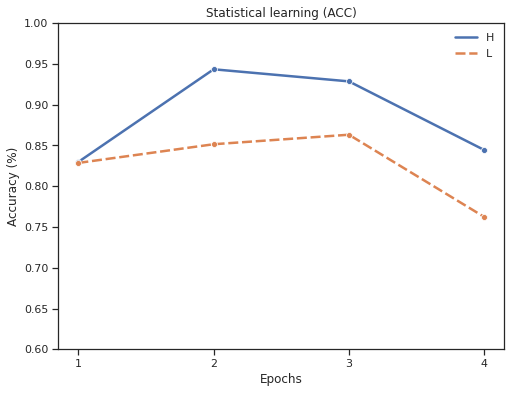

In [ ]:
#Statistical learning ACC figure
SL_ACC_figure = sns.lineplot(x="epoch", y="ACC", hue ="tripletType", style = "tripletType", marker = "o", err_style="bars", data=SL_ACC_long)
SL_ACC_figure.set(ylim=(0.6, 1))
SL_ACC_figure.set(xlabel ='Epochs', ylabel ='Accuracy (%)')
plt.legend(loc='upper right', frameon=False)
plt.xticks([1,2,3,4])
plt.title("Statistical learning (ACC)")
SL_ACC_figure
plt.savefig("SL_ACC_figure.png")

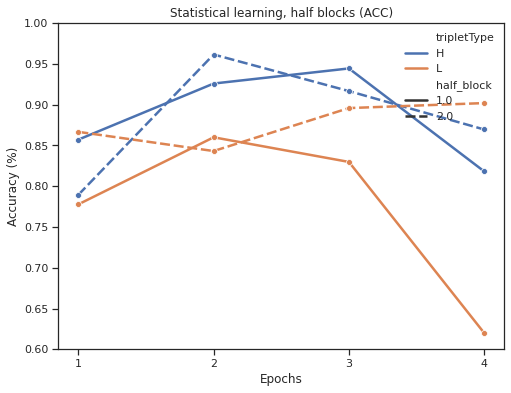

In [ ]:
#Statistical learning half-block ACC figure
SL_ACC_figure_HB = sns.lineplot(x="epoch", y="ACC", hue ="tripletType", style = "half_block", marker = "o", err_style="bars", data=SL_ACC_HB_long)
SL_ACC_figure_HB.set(ylim=(0.6, 1))
SL_ACC_figure_HB.set(xlabel ='Epochs', ylabel ='Accuracy (%)')
plt.legend(loc='upper right', frameon=False)
plt.xticks([1,2,3,4])
plt.title("Statistical learning, half blocks (ACC)")
SL_ACC_figure_HB
plt.savefig("SL_ACC_HB_figure.png")

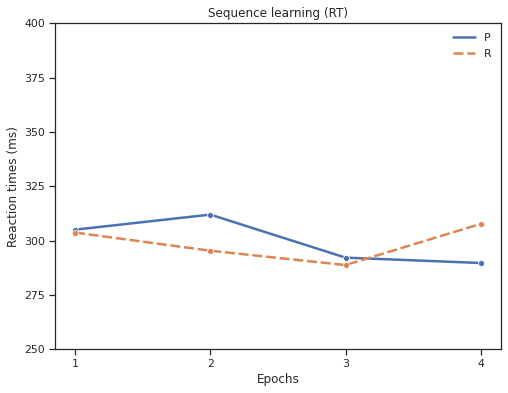

In [ ]:
#Sequence learning RT figure
HO_RT_figure = sns.lineplot(x="epoch", y="rt", hue = "trialType", style="trialType", marker = "o", err_style="bars", data=HO_RT_long)
HO_RT_figure.set(ylim=(250, 400))
HO_RT_figure.set(xlabel ='Epochs', ylabel ='Reaction times (ms)')
plt.legend(loc='upper right', frameon=False)
plt.yticks([250, 275, 300, 325, 350, 375, 400])
plt.xticks([1,2,3,4])
plt.title("Sequence learning (RT)")
HO_RT_figure
plt.savefig("HO_RT_figure.png")

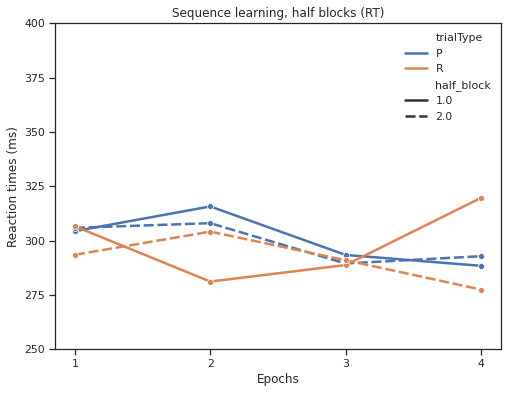

In [ ]:
#Sequence learning half-block RT figure
HO_RT_figure_HB = sns.lineplot(x="epoch", y="rt", hue = "trialType", style="half_block", marker = "o", err_style="bars", data=HO_RT_HB_long)
HO_RT_figure_HB.set(ylim=(250, 400))
HO_RT_figure_HB.set(xlabel ='Epochs', ylabel ='Reaction times (ms)')
plt.legend(loc='upper right', frameon=False)
plt.yticks([250, 275, 300, 325, 350, 375, 400])
plt.xticks([1,2,3,4])
plt.title("Sequence learning, half blocks (RT)")
HO_RT_figure_HB
plt.savefig("HO_RT_HB_figure.png")

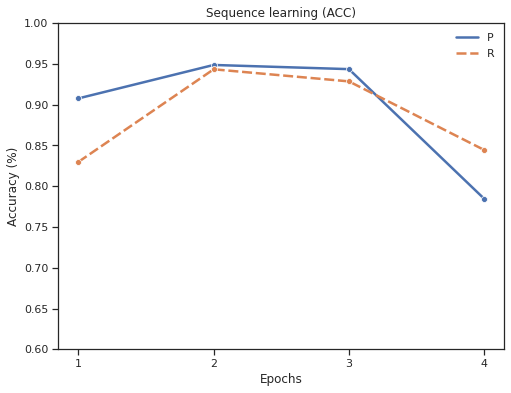

In [ ]:
#Sequence learning ACC figure
HO_ACC_figure = sns.lineplot(x="epoch", y="ACC", hue ="trialType", style = "trialType", marker = "o", err_style="bars", data=HO_ACC_long)
HO_ACC_figure.set(ylim=(0.6, 1))
HO_ACC_figure.set(xlabel ='Epochs', ylabel = "Accuracy (%)")
plt.legend(loc='upper right', frameon=False)
plt.xticks([1,2,3,4])
plt.title("Sequence learning (ACC)")
HO_ACC_figure
plt.savefig("HO_ACC_figure.png")

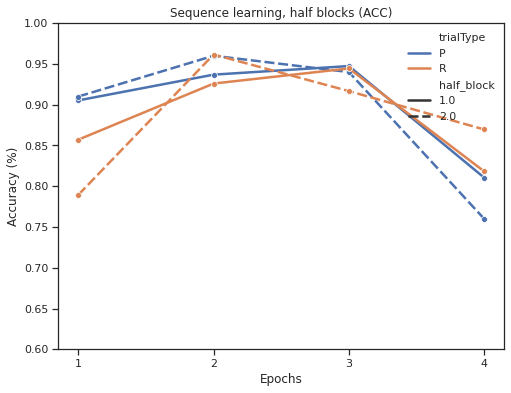

In [ ]:
#Sequence learning half-block ACC figure
HO_ACC_figure_HB = sns.lineplot(x="epoch", y="ACC", hue ="trialType", style = "half_block", marker = "o", err_style="bars", data=HO_ACC_HB_long)
HO_ACC_figure_HB.set(ylim=(0.6, 1))
HO_ACC_figure_HB.set(xlabel ='Epochs', ylabel = "Accuracy (%)")
plt.legend(loc='upper right', frameon=False)
plt.xticks([1,2,3,4])
plt.title("Sequence learning, half blocks (ACC)")
HO_ACC_figure_HB
plt.savefig("HO_ACC_HB_figure.png")